# Identify SS using PARSIM-K


In [70]:
import matplotlib.pyplot as plt
import numpy as np

from __future__ import division

from past.utils import old_div

# Checking path to access other files
try:
    from sippy import *
except ImportError:
    import sys, os

    sys.path.append(os.pardir)
    from sippy import *

import numpy as np
from sippy import functionset as fset
from sippy import functionsetSIM as fsetSIM
import matplotlib.pyplot as plt

import src.models as models
import src.helper as helper


In [93]:
from sippy import *

In [71]:

# np.random.seed(0)
# # Example to test SS-methods

# # sample time
# ts = 1.0

# # SISO SS system (n = 2)
# A = np.array([[0.89, 0.0], [0.0, 0.45]])
# B = np.array([[0.3], [2.5]])
# C = np.array([[0.7, 1.0]])
# D = np.array([[0.0]])

# tfin = 500
# npts = int(tfin // ts) + 1
# Time = np.linspace(0, tfin, npts)

# # Input sequence
# U = np.zeros((1, npts))
# [U[0], _, _] = fset.GBN_seq(npts, 0.05)

# # Output
# x, yout = fsetSIM.SS_lsim_process_form(A, B, C, D, U)

# # measurement noise
# noise = fset.white_noise_var(npts, [0.15])

# # Output with noise
# y_tot = yout + noise

# # Plotting
# # fig, axs = plt.subplots(3, 1, sharex=True)
# # axs[0].plot(Time, U[0])
# # axs[0].set_ylabel("input")
# # axs[0].grid()
# # axs[0].set_xlabel("Time")
# # fig.savefig(output_dir + "/input.png")

# # axs[1].plot(Time, y_tot[0])
# # axs[1].set_ylabel("y_tot")
# # axs[1].grid()
# # axs[1].set_xlabel("Time")
# # axs[1].set_title("Ytot")
# # fig.savefig(output_dir + "/ytot.png")

# # System identification
# METHOD: list[SSMethods] = [
#     "CVA",
#     "MOESP",
#     "N4SID",
#     "PARSIM_K",
#     "PARSIM_P",
#     "PARSIM_S",
# ]
# legend = ["System"]

# # axs[2].plot(Time, y_tot[0], label="System")
# for method in METHOD:
#     sys_id = system_identification(y_tot, U, method, 2, SS_threshold=0.1)
#     if not isinstance(sys_id, SS_Model):
#         raise ValueError("SS model not returned")
#     xid, yid = fsetSIM.SS_lsim_process_form(
#         sys_id.A, sys_id.B, sys_id.C, sys_id.D, U, sys_id.x0
#     )
# #     axs[2].plot(Time, yid[0], label=method)
# # axs[2].legend()
# # fig.savefig(output_dir + "/result.png")

# plt.close("all")


In [72]:
A1 = 1
A2 = 0.5
k1 = 0.5
k2 = 0.8

TwoTanks = models.TwoTanks(True, A1, A2, k1, k2)

In [73]:
# example simulation
sim_time = 500
Ts = 1
h1 = 1
h2 = 0.5
h0 = [h1, h2]
u = np.ones((sim_time,2))*0.5


sim = TwoTanks.simulate(h0, u, Ts)

In [74]:
constrains = np.array([[0, 0.5], [0, 1]])
step_time = 100
no_steps = 100
steps = helper.generate_steps(step_time, no_steps, constrains)

In [75]:
Ts = 1
h1 = 1
h2 = 0.5
u1 = steps[0,:]
u2 = steps[1,:]

sim = TwoTanks.simulate([h1, h2], steps, Ts)

In [76]:
# add noise to sim data
add_noise = True
if add_noise:
    # add noise to the simulation data
    # set random seed for reproducibility
    np.random.seed(42)
    noise = np.random.normal(0, 0.1, sim["Y"].shape)
    sim["Y"] += noise

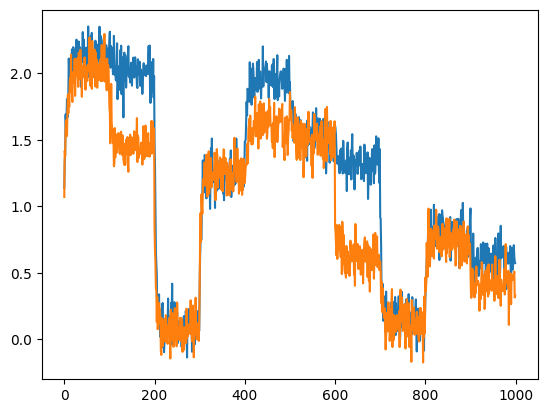

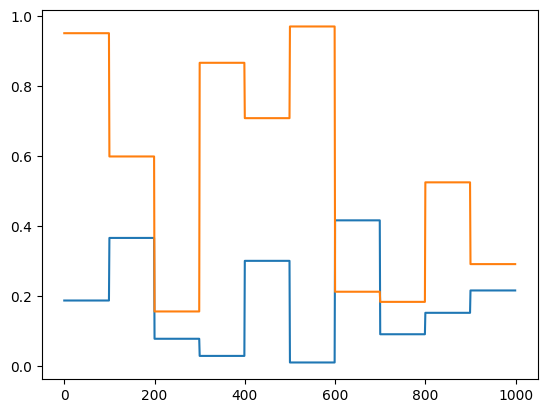

In [77]:
part = 1000
plt.plot(sim["Y"][:part])

plt.figure()
plt.plot(sim["U"][:part])

In [78]:
train_sim = {key: value[:5000] for key, value in sim.items()}
test_sim = {key: value[7000:] for key, value in sim.items()}
dev_sim = {key: value[5000:7000] for key, value in sim.items()}

In [79]:
y_tot = train_sim["Y"]
U = train_sim["U"].T

In [80]:

sys_id = system_identification(y_tot, U, 'PARSIM-K', SS_fixed_order = 10)
#sys_id = system_identification(y_tot, U, method, SS_fixed_order = 2 )

In [81]:
sys_id.A, sys_id.B, sys_id.C, sys_id.D

(array([[ 9.70805678e-01,  1.07852046e-01,  2.59578767e-02,
          5.51980167e-03, -1.03589170e-03,  1.63364563e-02,
          1.83117075e-03,  5.33632793e-03,  1.65045112e-04,
         -6.68914879e-03],
        [ 4.30976827e-02,  8.00239375e-01, -4.33177174e-02,
         -2.45385686e-02,  1.91268142e-02, -6.86417124e-02,
         -5.41481375e-03, -3.74099035e-02,  2.38624749e-02,
          1.03753717e-02],
        [-5.40313431e-03, -2.29407591e-02,  9.80328781e-01,
         -1.66299646e-02, -2.68020696e-02, -3.49153736e-02,
         -1.96311720e-02,  6.10974324e-03, -2.74501306e-02,
          2.33070417e-02],
        [-1.29769352e-01,  1.14020691e-02, -1.07090842e-02,
         -7.41126483e-01, -6.36755204e-01, -2.59810137e-02,
         -6.17512912e-02, -1.85761234e-02,  5.97413413e-02,
         -1.07210758e-01],
        [-7.34996801e-02, -3.44305633e-02,  2.67535220e-02,
          5.90783861e-01, -5.13817256e-01, -2.66755480e-01,
         -4.48060649e-01,  1.63517737e-02,  1.614497

In [82]:
append = "_parsimK"
np.save('./data/A' + append + '.npy', sys_id.A)
np.save('./data/B' + append + '.npy', sys_id.B)
np.save('./data/C' + append + '.npy', sys_id.C)

In [83]:
np.linalg.pinv(sys_id.C)@test_sim["Y"][0].reshape(-1, 1)

array([[-0.52951908],
       [ 0.30895456],
       [-0.16485532],
       [ 0.02494928],
       [-0.06062912],
       [ 0.03957439],
       [-0.03000017],
       [ 0.07006374],
       [-0.07432951],
       [ 0.04212746]])

In [84]:
sys_id.x0

array([[-0.14164922],
       [ 0.64493609],
       [ 0.34403856],
       [ 0.11731931],
       [ 0.16571262],
       [ 0.3786186 ],
       [ 0.26763134],
       [-0.17050086],
       [ 0.50676698],
       [-0.54805283]])

In [85]:
xid, yid = fsetSIM.SS_lsim_process_form(
        sys_id.A, sys_id.B, sys_id.C, sys_id.D, test_sim["U"].T, np.linalg.pinv(sys_id.C)@test_sim["Y"][0].reshape(-1, 1)
    )

In [86]:
yid.shape

(2, 3000)

In [87]:
#     "CVA", - same
#     "MOESP", - same
#     "N4SID", - same
#     "PARSIM_K",
#     "PARSIM_P",
#     "PARSIM_S",

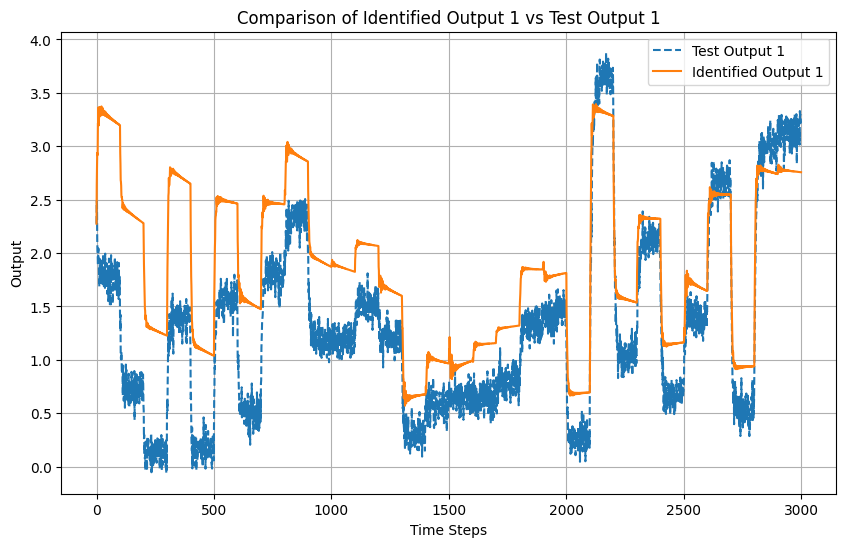

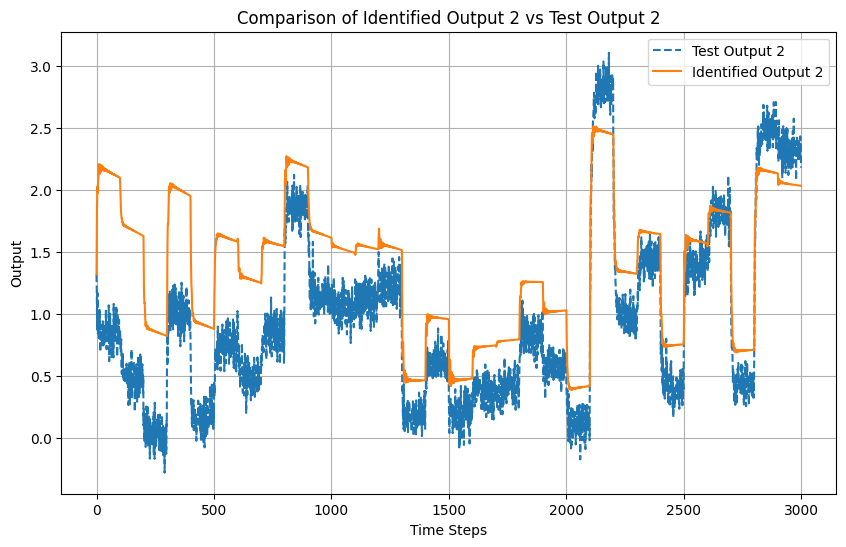

In [88]:
plt.figure(figsize=(10, 6))
plt.plot(test_sim["Y"][:, 0], label="Test Output 1", linestyle="--")
plt.plot(yid[0, :], label="Identified Output 1")
plt.xlabel("Time Steps")
plt.ylabel("Output")
plt.title("Comparison of Identified Output 1 vs Test Output 1")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(test_sim["Y"][:, 1], label="Test Output 2", linestyle="--")
plt.plot(yid[1, :], label="Identified Output 2")
plt.xlabel("Time Steps")
plt.ylabel("Output")
plt.title("Comparison of Identified Output 2 vs Test Output 2")
plt.legend()
plt.grid()
plt.show()

In [89]:
xid, yid = fsetSIM.SS_lsim_process_form(
        sys_id.A, sys_id.B, sys_id.C, sys_id.D, train_sim["U"].T, np.linalg.pinv(sys_id.C)@train_sim["Y"][0].reshape(-1, 1)#sys_id.x0
    )

In [90]:
train_sim["U"].T

array([[0.18727006, 0.18727006, 0.18727006, ..., 0.01270956, 0.01270956,
        0.01270956],
       [0.95071431, 0.95071431, 0.95071431, ..., 0.10789143, 0.10789143,
        0.10789143]])

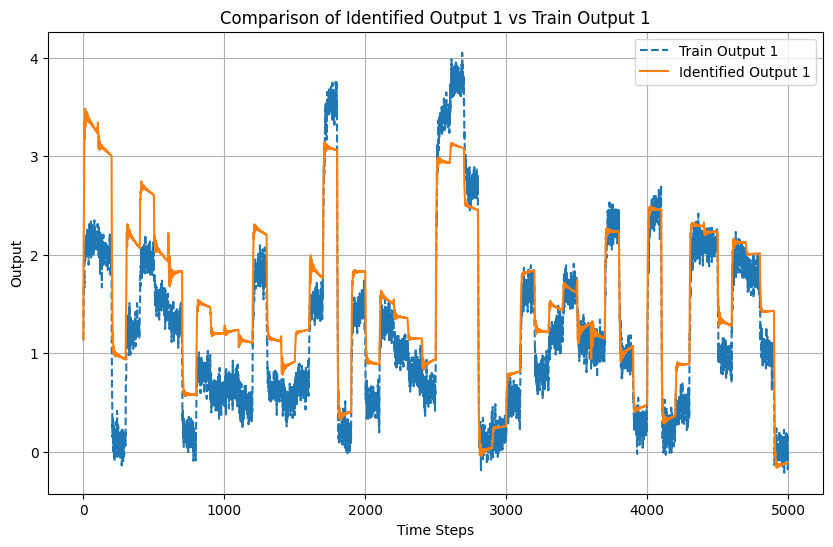

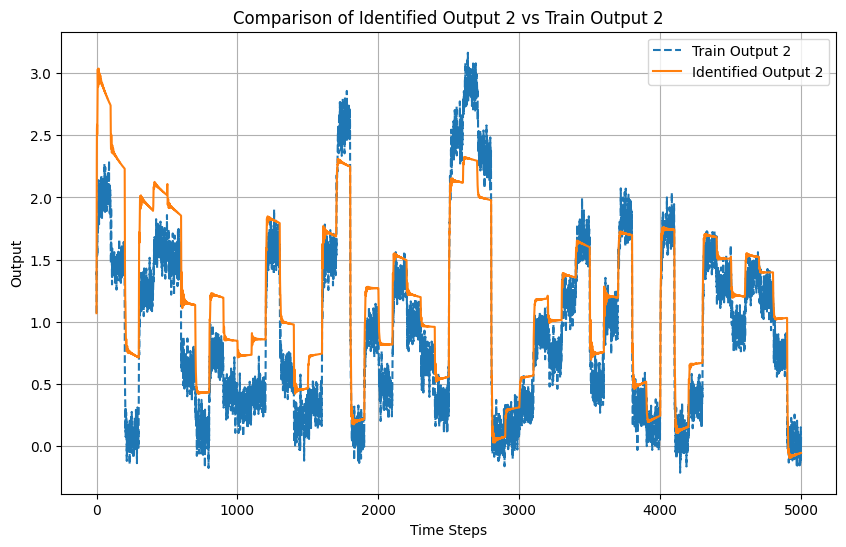

In [91]:
plt.figure(figsize=(10, 6))
plt.plot(train_sim["Y"][:, 0], label="Train Output 1", linestyle="--")
plt.plot(yid[0, :], label="Identified Output 1")
plt.xlabel("Time Steps")
plt.ylabel("Output")
plt.title("Comparison of Identified Output 1 vs Train Output 1")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(train_sim["Y"][:, 1], label="Train Output 2", linestyle="--")
plt.plot(yid[1, :], label="Identified Output 2")
plt.xlabel("Time Steps")
plt.ylabel("Output")
plt.title("Comparison of Identified Output 2 vs Train Output 2")
plt.legend()
plt.grid()
plt.show()

In [92]:
# # -*- coding: utf-8 -*-
# """
# Created on Fri Jan 19 2018

# @author: Giuseppe Armenise, revised by RBdC

# In this test, no error occurs. 
# Using method='N4SID','MOESP' or 'CVA', if the message
# "Kalman filter cannot be calculated" is shown, it means
# that the package slycot is not well-installed.

# """
# from __future__ import division

# from past.utils import old_div

# # Checking path to access other files
# try:
#     from sippy import *
# except ImportError:
#     import sys, os

#     sys.path.append(os.pardir)
#     from sippy import *

# import numpy as np
# from sippy import functionset as fset
# from sippy import functionsetSIM as fsetSIM
# import matplotlib.pyplot as plt


# # Example to test SS-methods

# # sample time
# ts = 1.0

# # SISO SS system (n = 2)
# A = np.array([[0.89, 0.], [0., 0.45]])
# B = np.array([[0.3], [2.5]])
# C = np.array([[0.7, 1.]])
# D = np.array([[0.0]])

# tfin = 500
# npts = int(old_div(tfin, ts)) + 1
# Time = np.linspace(0, tfin, npts)

# # Input sequence
# U = np.zeros((1, npts))
# [U[0],_,_] = fset.GBN_seq(npts, 0.05)

# ##Output
# x, yout = fsetSIM.SS_lsim_process_form(A, B, C, D, U)

# # measurement noise
# noise = fset.white_noise_var(npts, [0.15])

# # Output with noise
# y_tot = yout + noise

# #
# plt.close("all")
# plt.figure(0)
# plt.plot(Time, U[0])
# plt.ylabel("input")
# plt.grid()
# plt.xlabel("Time")
# #
# plt.figure(1)
# plt.plot(Time, y_tot[0])
# plt.ylabel("y_tot")
# plt.grid()
# plt.xlabel("Time")
# plt.title("Ytot")

# ##System identification
# METHOD = ['N4SID', 'CVA', 'MOESP', 'PARSIM-S', 'PARSIM-P', 'PARSIM-K']
# lege = ['System']
# for i in range(len(METHOD)):
#     method = METHOD[i]
#     sys_id = system_identification(y_tot, U, method, SS_fixed_order = 2 )
#     xid, yid = fsetSIM.SS_lsim_process_form(sys_id.A, sys_id.B, sys_id.C, sys_id.D, U, sys_id.x0)
#     #
#     plt.plot(Time, yid[0], label = method)
#     plt.show()
#     lege.append(method) 
# plt.legend() 
